# EDA
This notebook contains an exploratory data analysis on the [Brist1d](https://www.kaggle.com/competitions/brist1d/data) dataset, from the respective Kaggle competition

In [1]:
# import requiered libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read raw train data
train = pd.read_csv( '../data/raw/train.csv' , index_col = 0 )
train.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [3]:
# Read the 'all_train.csv' file, to get a table with the parsed/processed data
all_train = pd.read_csv( '../data/interim/all_train.csv' ,  parse_dates = [0] ,  index_col = 0 )
time_res = all_train[['p_num','initial_resolution']].drop_duplicates()
time_res_d = dict( zip( time_res.p_num , time_res.initial_resolution ) )

#Add the time resolution to the raw data
train['initial_resolution'] = train['p_num'].map( time_res_d )

# NOTE: some entries in activity are really the same category. For example 'Walk' & 'Walking'
# I will proceed to convert those cases
conv_d = {
    'Walking':'Walk',
    'Running':'Run',
    'Weights':'Strength training'

}

all_train['activity'] = all_train['activity'].replace( conv_d )

In [4]:
# Print the description of the numeric variables
all_train.describe()

,bg,insulin,carbs,hr,steps,cals,bg+1:00
count,177435.00000,224169.000000,3340.000000,173606.000000,114273.000000,192003.000000,177024.000000
mean,8.27683,0.194157,44.705689,78.263612,55.574554,9.366523,8.277045
std,2.99638,0.961268,36.440903,17.797510,110.431566,7.828043,2.996398
min,2.20000,-0.307800,1.000000,37.600000,0.000000,0.030000,2.200000
25%,6.10000,0.050000,22.000000,64.000000,0.000000,5.600000,6.100000
50%,7.70000,0.075000,35.000000,76.800000,9.000000,6.150000,7.700000
75%,9.90000,0.097400,60.000000,88.900000,59.000000,9.400000,9.900000
max,27.80000,46.311000,852.000000,185.300000,1359.000000,116.100000,27.800000


In [5]:
print( (all_train.insulin < 0).value_counts() )

insulin
False    235125
True          2
Name: count, dtype: int64


Two values in the insuline column are negative. This is incorrect, given that **insuline** shows the ammount of insuline delivered by the pump .

# Plot the global distribution of all the features and response variable


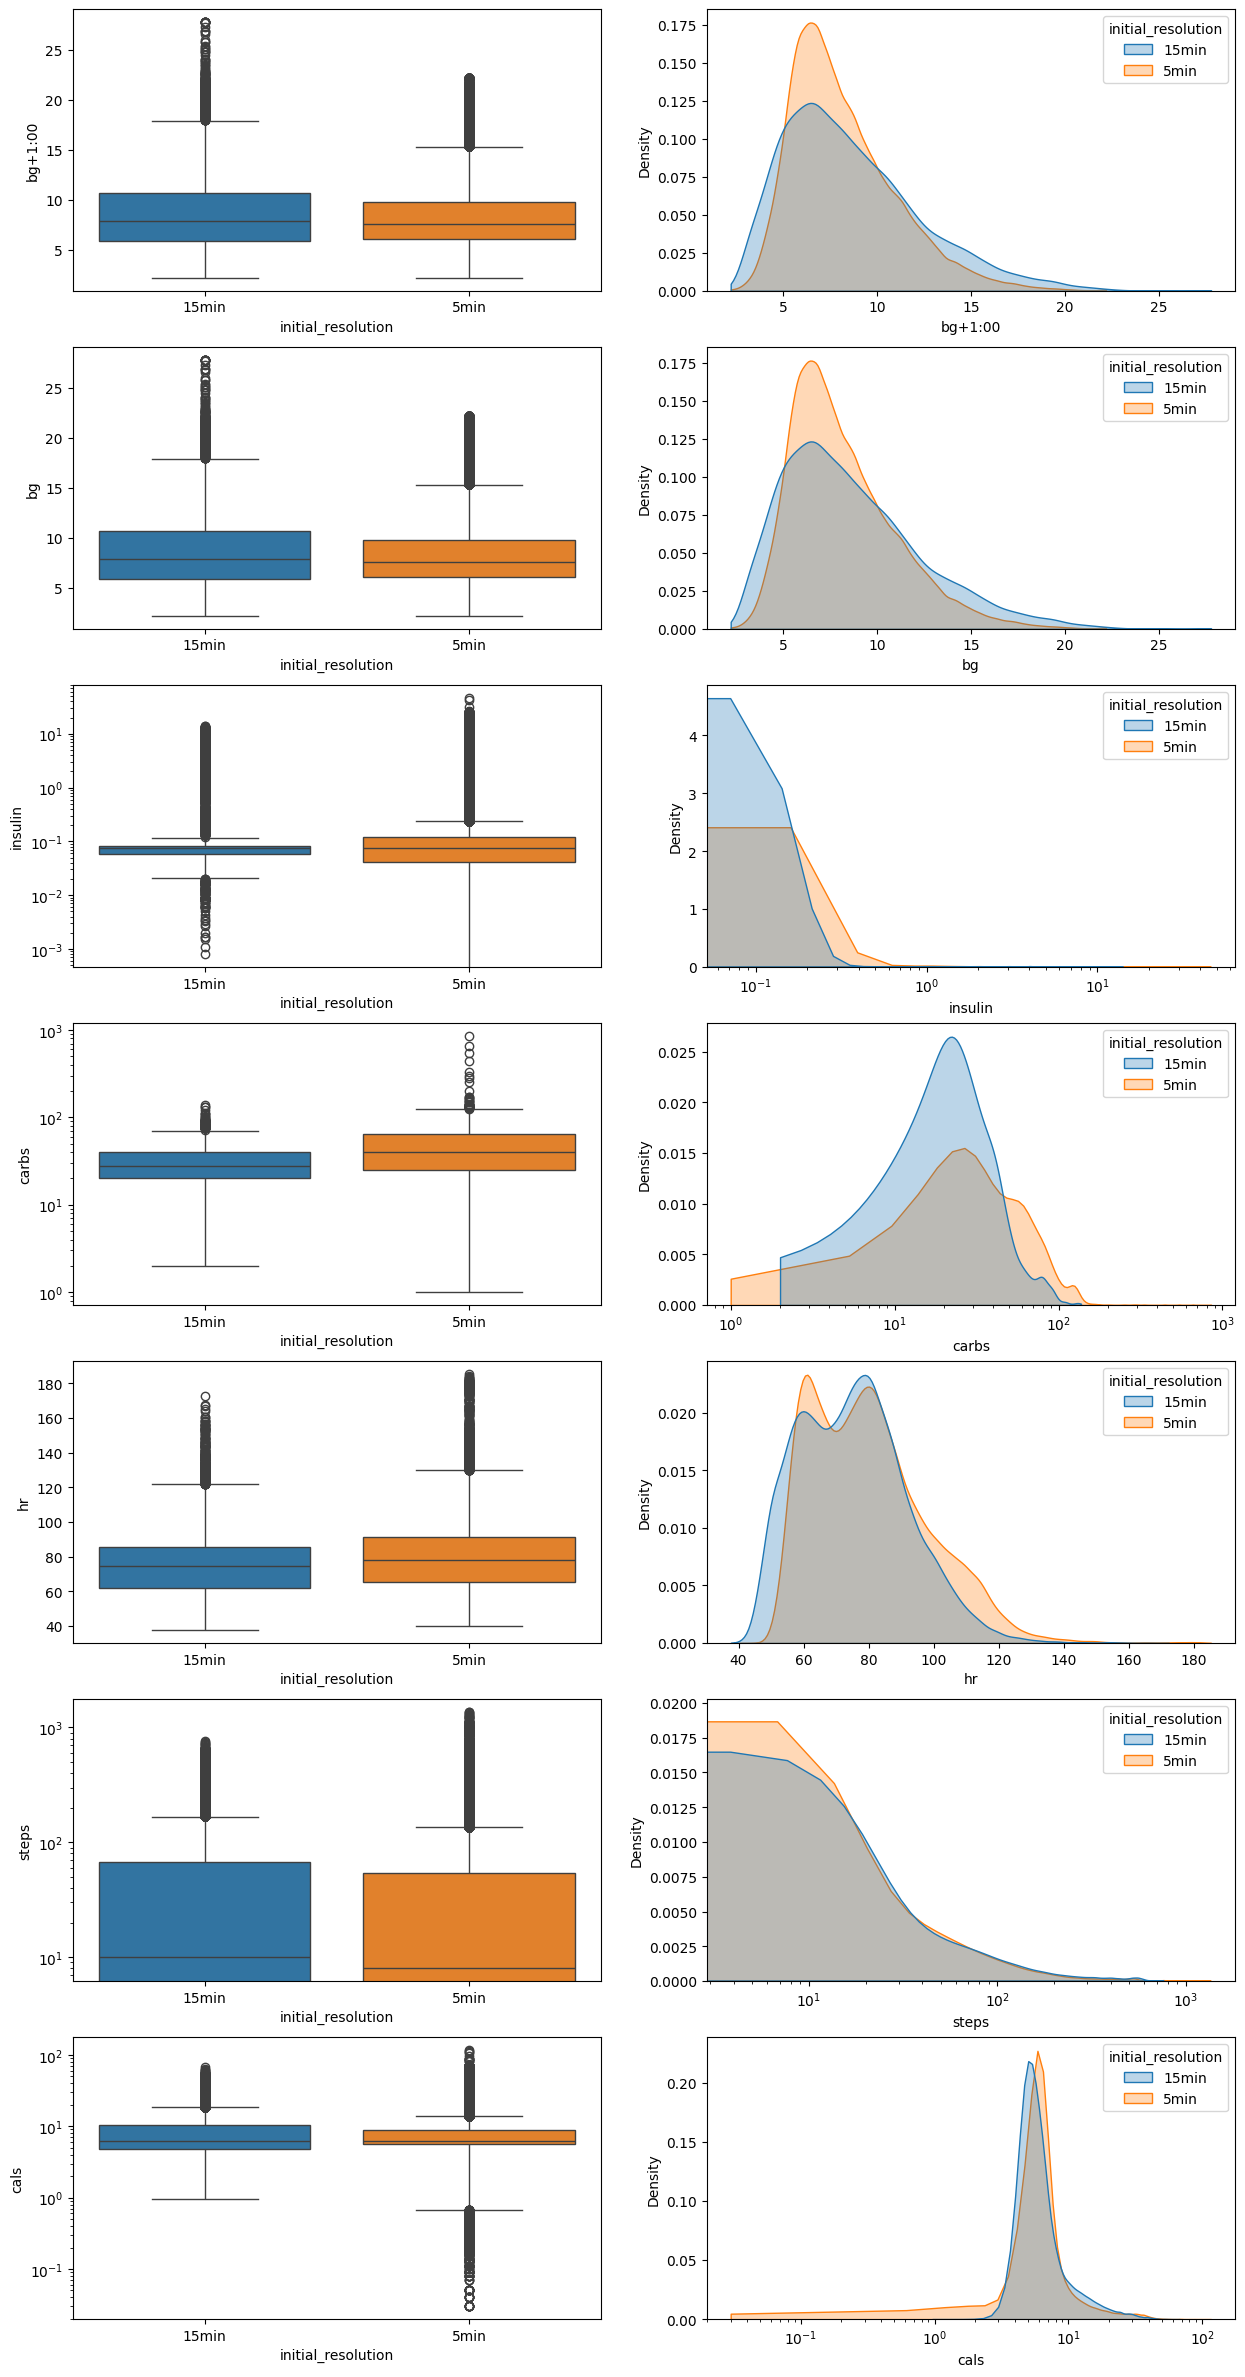

In [6]:
metrics_l = ['bg+1:00','bg','insulin','carbs','hr','steps','cals']

fig,ax = plt.subplots(7,2,figsize=(15,30))
ax_ix = 0

for metric in metrics_l:
    # print( metric )
    sns.boxplot( 
        data = all_train.reset_index() ,
        x = 'initial_resolution' , 
        y = metric , 
        hue = 'initial_resolution' , 
        ax = ax[ ax_ix , 0 ] 
        )
    
    sns.kdeplot( 
        data = all_train.reset_index()  , 
        x = metric , 
        hue = 'initial_resolution' , 
        ax = ax[ ax_ix , 1 ] , 
        common_norm = False , 
        fill = True , 
        alpha = .3 ,
        cut = 0
        )
    
    if metric not in ['bg+1:00','bg','hr']:
        ax[ ax_ix , 0 ].set_yscale( 'log' )
        ax[ ax_ix , 1 ].set_xscale( 'log' )

    ax_ix += 1


# Plot the global activity level  ( across all the data set ) for each patient

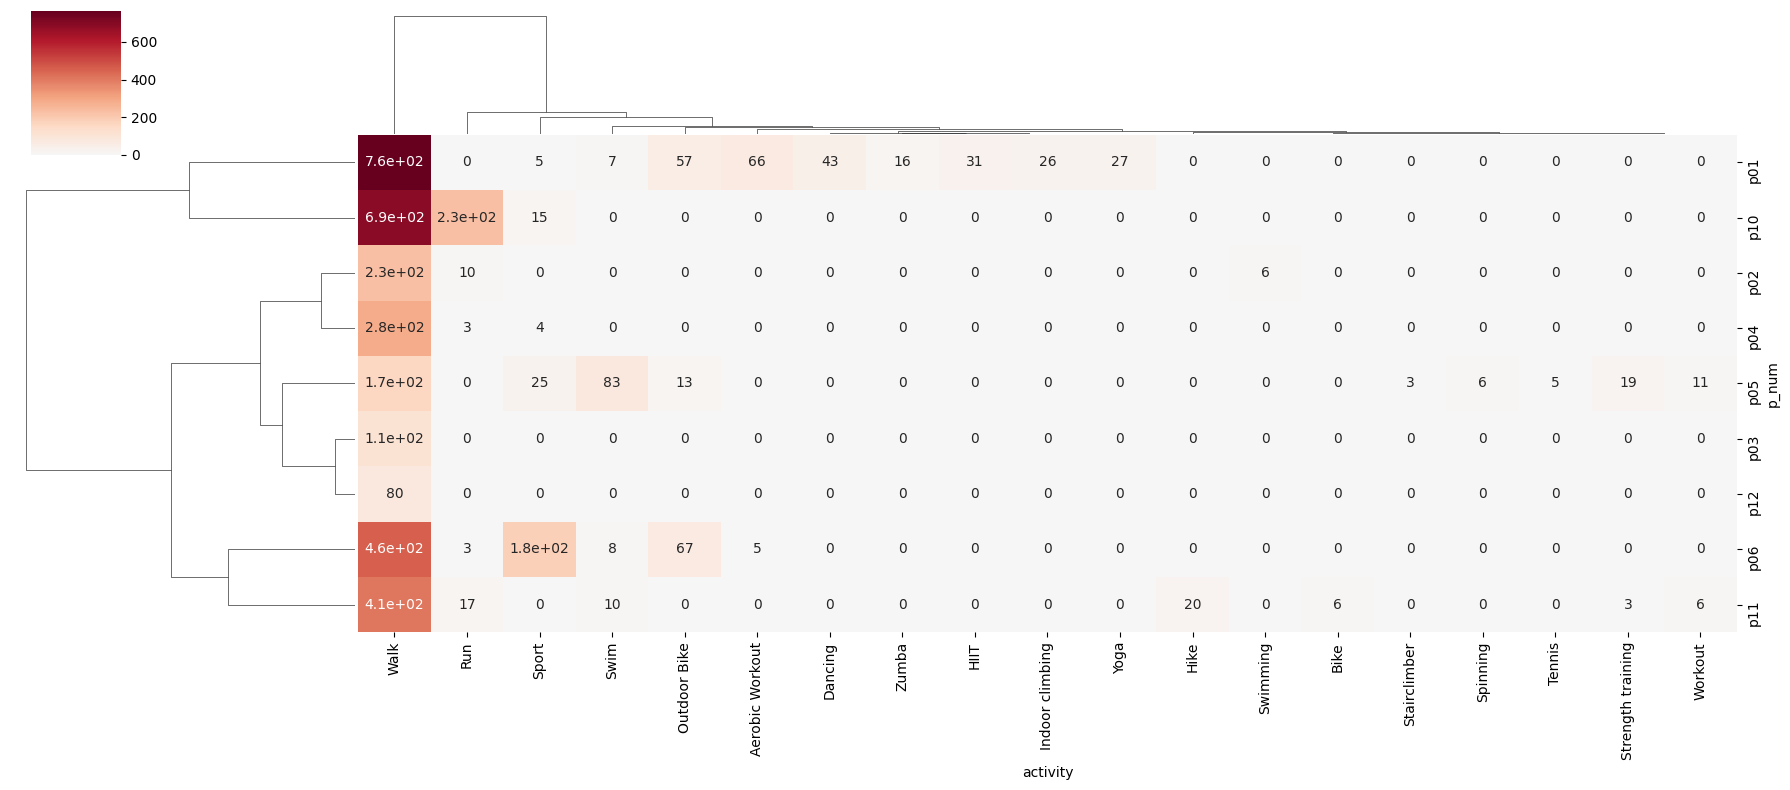

In [7]:
activity_df = pd.crosstab( all_train.p_num , all_train.activity )
sns.clustermap( activity_df , center = 0 , cmap = "RdBu_r" , annot = True , figsize=(18,8) )

# what is the correlation among numerical variables in the data ?

<Axes: >

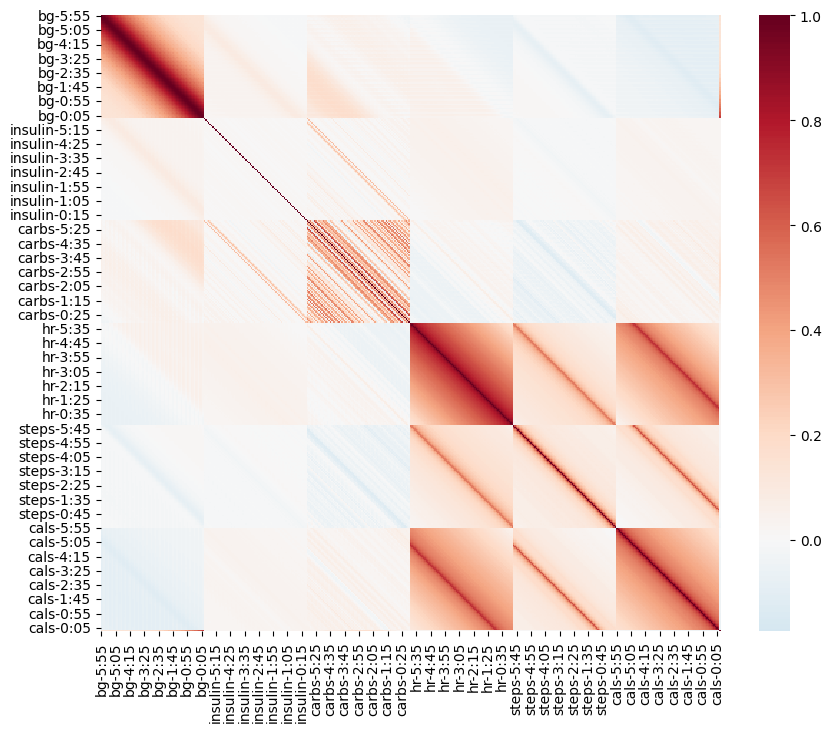

In [8]:
plt.figure( figsize=(10,8) )
corr_df = train.select_dtypes( include = np.number ).corr()
sns.heatmap( corr_df , center = 0 , cmap = "RdBu_r" )

# Display the correlation between **bg+1:00** and all features

<Axes: >

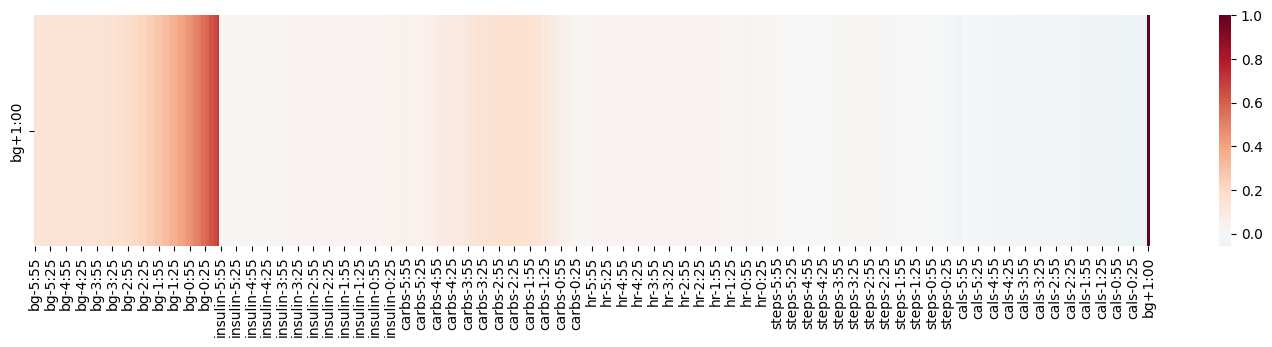

In [9]:
plt.figure( figsize=(18,3) )
sns.heatmap( pd.DataFrame( corr_df.loc[:,'bg+1:00'] ).T , center = 0 , cmap = "RdBu_r" )

<Figure size 1500x1000 with 0 Axes>

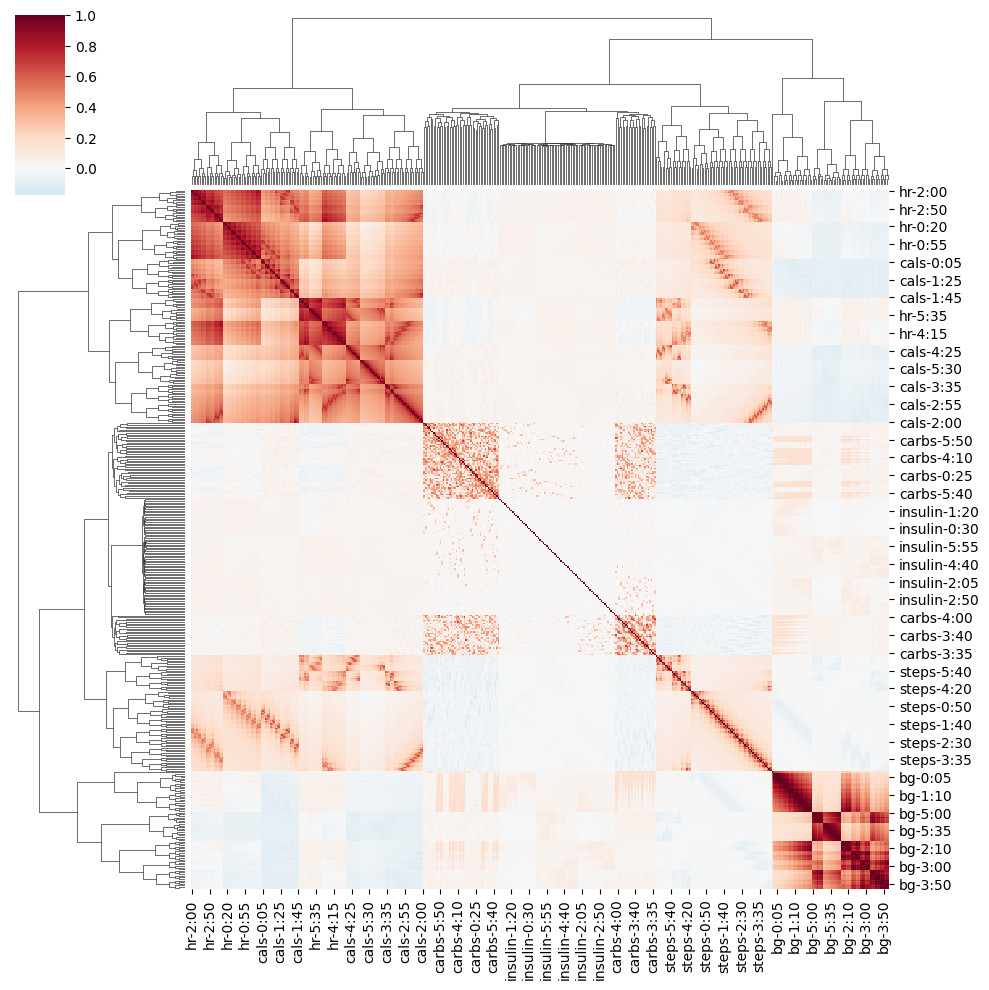

In [10]:
plt.figure( figsize=(15,10) )
sns.clustermap( corr_df , center = 0 , cmap = "RdBu_r" )

# Display example of correlation values  and an global ECDF plot

In [11]:
# corr_df = train.select_dtypes( include = np.number ).corr()
bg_plus_1_corr = pd.DataFrame( corr_df.loc[:,'bg+1:00'] ).sort_values( 'bg+1:00' , ascending = False ).reset_index()
bg_plus_1_corr.columns = ['column','bg+1h_corr']
bg_plus_1_corr[['metric','time']] = bg_plus_1_corr['column'].str.split('-',expand=True)
bg_plus_1_corr.groupby('metric').agg({'bg+1h_corr':np.mean})

html1 = bg_plus_1_corr.head( 10 ).to_html()
html2 = bg_plus_1_corr.iloc[30:40].to_html()
html3 = bg_plus_1_corr.tail( 10 ).to_html()

display_html(
    f'<div style="display:inline-block; padding-right:10px;">{html1}</div>'
    f'<div style="display:inline-block; padding-right:10px;">{html2}</div>'
    f'<div style="display:inline-block">{html3}</div>',
    raw = True 
)


,column,bg+1h_corr,metric,time
0,bg+1:00,1.000000,bg+1:00,None
1,bg-0:00,0.700750,bg,0:00
2,bg-0:05,0.658533,bg,0:05
3,bg-0:10,0.631411,bg,0:10
4,bg-0:15,0.624325,bg,0:15
5,bg-0:20,0.583130,bg,0:20
6,bg-0:25,0.559578,bg,0:25
7,bg-0:30,0.557125,bg,0:30
8,bg-0:35,0.517450,bg,0:35
9,bg-0:45,0.497884,bg,0:45


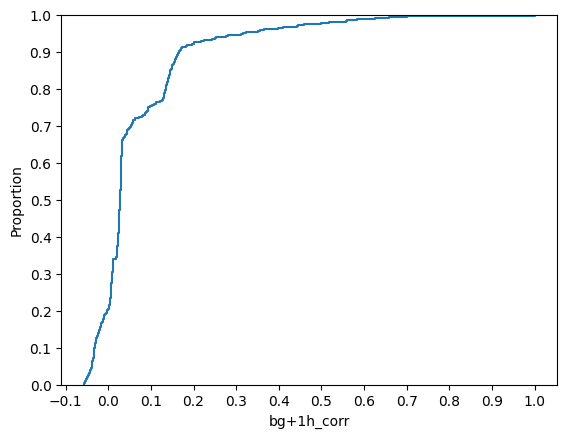

In [12]:
sns.ecdfplot(data=bg_plus_1_corr, x="bg+1h_corr")
plt.xticks( np.arange(-0.1,1.01,.1) )
plt.yticks( np.arange(0,1.01,.1) );

# Let's make example scatterplots for high-, mid- or low- correlataed features to bg+1:00

<Axes: xlabel='cals-0:45', ylabel='bg+1:00'>

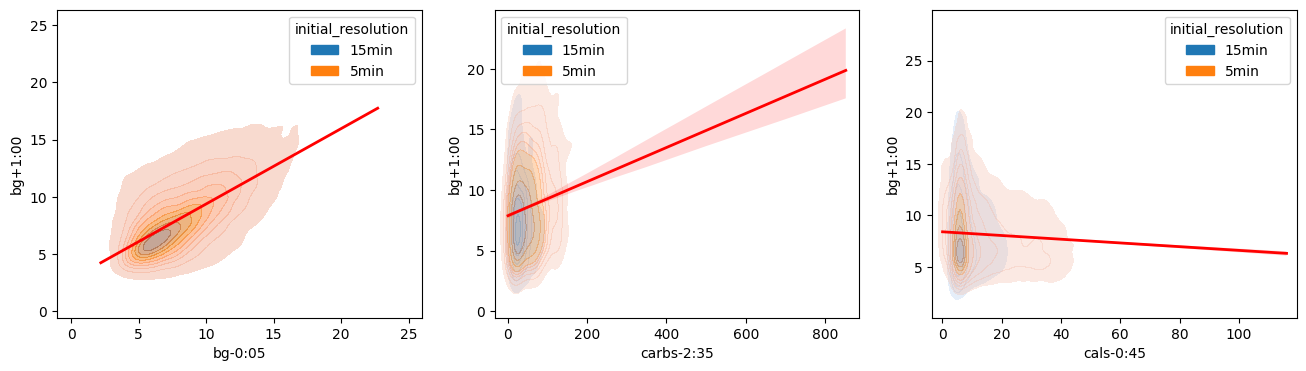

In [13]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax = ax.flatten()

sns.kdeplot( data = train , y = 'bg+1:00' , x = 'bg-0:05' , hue = 'initial_resolution' , fill = True , alpha = .5, ax = ax[0] )
sns.regplot( data = train , y = 'bg+1:00' , x = 'bg-0:05' , scatter = False , color = 'red' , line_kws={'linewidth': 2} , ax = ax[0] )

sns.kdeplot( data = train , y = 'bg+1:00' , x = 'carbs-2:35' , hue = 'initial_resolution' , fill = True , alpha = .3 , ax = ax[1] )
sns.regplot( data = train , y = 'bg+1:00' , x = 'carbs-2:35' , scatter = False , color = 'red' , line_kws={'linewidth': 2} , ax = ax[1] )

sns.kdeplot( data = train , y = 'bg+1:00' , x = 'cals-0:45' , hue = 'initial_resolution' , fill = True , alpha = .3 , ax = ax[2] )
sns.regplot( data = train , y = 'bg+1:00' , x = 'cals-0:45' , scatter = False , color = 'red' , line_kws={'linewidth': 2} , ax = ax[2] )

# Another thing to look at is the fraction of NAs per columns. IF some have a high fraction of missin values, we might need to drop them.

In [14]:
# Count of NAs across all patients in the parsed data
f_df = pd.DataFrame( all_train.drop(['p_num','initial_resolution'],axis=1).isna().sum() / all_train.shape[0] )
f_df.reset_index( inplace = True )
f_df.columns = ['metric','na_f']
f_df.sort_values( 'na_f' , inplace = True )
f_df = f_df[ f_df['metric'] != 'bg+1:00' ]
f_df

,metric,na_f
1,insulin,0.046605
5,cals,0.183407
0,bg,0.245365
3,hr,0.261650
4,steps,0.513995
6,activity,0.982018
2,carbs,0.985795


# Global Time Series Correlation Analysis

<Figure size 300x300 with 0 Axes>

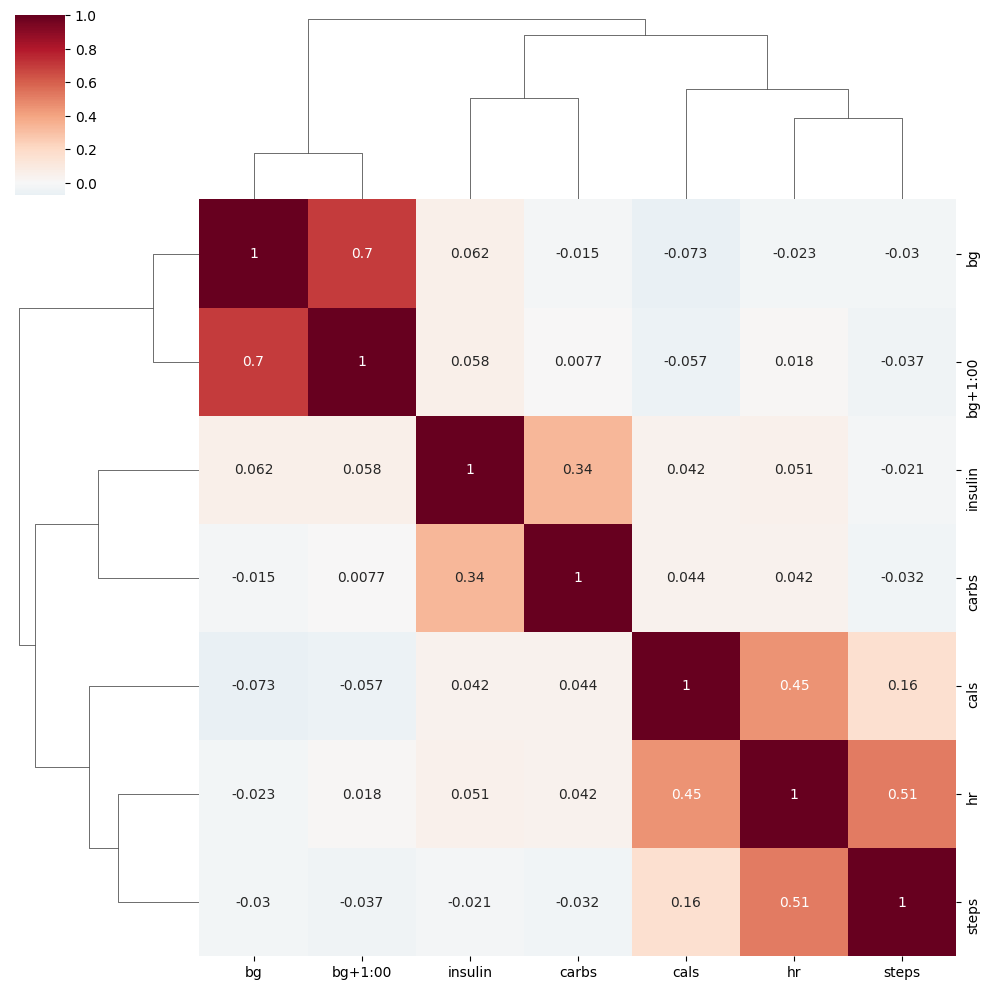

In [15]:
test = all_train[['bg','insulin','carbs','hr','steps','cals','bg+1:00']]
#test =  test - test.mean()

plt.figure( figsize=(3,3) )
sns.clustermap( test.corr() , center = 0 , cmap = "RdBu_r" , annot = True );